In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import powerlaw
import matplotlib.colors as mcolors
from operator import itemgetter
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_palette("Paired")
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
import pickle

In [4]:
df = pd.read_csv("../data_collection/data_biden/df_per_grafo_pesato.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   


In [5]:
df

,Unnamed: 0,source,id_source,target,id_target,weights
0,0,scienceinvestme,135970150,JoeBiden,939091,1.000000
1,1,elnurrik3,1172766864268832769,POTUS,1349149096909668363,0.661017
2,2,dmaga101,1267802238874877953,JoeBiden,939091,0.661017
3,3,slothsforme,3842652433,POTUS,1349149096909668363,0.491525
4,4,natashaejs,1262462710568022017,ProjectLincoln,1205226529455632385,0.457627
...,...,...,...,...,...,...
32434,32434,goldbaron08,2661167788,CHIZMAGA,34756550,0.000000
32435,32435,goldbaron08,2661167788,1JohnEBravo,973674483151237121,0.000000
32436,32436,goinglikesixty,126478904,kaitlancollins,180107694,0.000000
32437,32437,goinglikesixty,126478904,carolstam7,326098537,0.000000


In [6]:
del df['Unnamed: 0']
del df['id_source']
del df['id_target']

In [7]:
df

,source,target,weights
0,scienceinvestme,JoeBiden,1.000000
1,elnurrik3,POTUS,0.661017
2,dmaga101,JoeBiden,0.661017
3,slothsforme,POTUS,0.491525
4,natashaejs,ProjectLincoln,0.457627
...,...,...,...
32434,goldbaron08,CHIZMAGA,0.000000
32435,goldbaron08,1JohnEBravo,0.000000
32436,goinglikesixty,kaitlancollins,0.000000
32437,goinglikesixty,carolstam7,0.000000


In [8]:
df.source = df.source.astype(str)
df.target = df.target.astype(str)

g = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph(), edge_attr = "weights")

#coverto il grafo diretto in indiretto

g = g.to_undirected() #multigrafo (più collegamenti tra gli stessi nodi)
g_cc = nx.Graph(g) #grafo (un solo collegamento)

In [9]:
print(nx.info(g))
print(nx.info(g_cc))

Name: 
Type: MultiGraph
Number of nodes: 22737
Number of edges: 32438
Average degree:   2.8533
Name: 
Type: Graph
Number of nodes: 22737
Number of edges: 32438
Average degree:   2.8533


In [10]:
#saving the graph for gephi viz
nx.write_gexf(g, "grafoBiden.gexf")

## Basic Measures

In [186]:
g.number_of_nodes()

22737

In [187]:
g.number_of_edges()

32438

In [188]:
g.is_directed()

False

In [189]:
nx.number_of_selfloops(g)

0

In [190]:
#Average Degree
sum(dict(g.degree()).values())/float(len(g))

2.85332277785108

In [191]:
def find_hubs(G, degree_threshold):
    '''Function for extracting hubs and not hubs from the network'''
    hubs = []
    notHubs = []
    for i in G:
        if G.degree(i) >= degree_threshold:
            tupla = tuple([i, G.degree(i)])
            hubs.append(tupla)
        else:
            tupla = tuple([i, G.degree(i)])
            notHubs.append(tupla)
    print(len(hubs))
    print(hubs)
    return hubs, notHubs

In [192]:
hubs, notHubs = find_hubs(g, 80)

42
[('JoeBiden', 1314), ('POTUS', 487), ('ProjectLincoln', 106), ('realDonaldTrump', 1046), ('nytimes', 93), ('theliberalpov', 81), ('jphoganorg', 83), ('VP', 87), ('HillaryClinton', 83), ('BernieSanders', 207), ('KamalaHarris', 175), ('irvinepmaicon', 120), ('dcfairbank', 177), ('CNN', 180), ('blesamerica', 195), ('GOP', 160), ('letshearthetru', 136), ('FoxNews', 145), ('WhiteHouse', 166), ('mstmo1983', 108), ('BarackObama', 111), ('moogoo3544', 111), ('thehill', 254), ('seanhannity', 90), ('mark3ds', 137), ('expose_ccp', 87), ('miksu2006', 94), ('SpeakerPelosi', 91), ('lorirennie', 91), ('ozbatrisa', 149), ('DonaldJTrumpJr', 113), ('MSNBC', 155), ('fabfashionista8', 88), ('washingtonpost', 83), ('312shelly3', 81), ('ewarren', 86), ('ABC', 95), ('garygreno', 81), ('big_crusher1000', 106), ('seanrohan32', 112), ('butchornile', 87), ('cokogay', 96)]


In [193]:
df_hubs = pd.DataFrame(hubs, columns=['User', 'Degree'])

In [194]:
df_hubs = df_hubs.sort_values(by = ['Degree'], ascending = False)
df_hubs = df_hubs.reset_index(drop = True)

In [195]:
df_hubs_10 = df_hubs.iloc[:11]

In [196]:
df_hubs_10
#POTUS è l'account del presidente degli stati uniti d'america
#GOP è del partito repubblicano
#

,User,Degree
0,JoeBiden,1314
1,realDonaldTrump,1046
2,POTUS,487
3,thehill,254
4,BernieSanders,207
5,blesamerica,195
6,CNN,180
7,dcfairbank,177
8,KamalaHarris,175
9,WhiteHouse,166


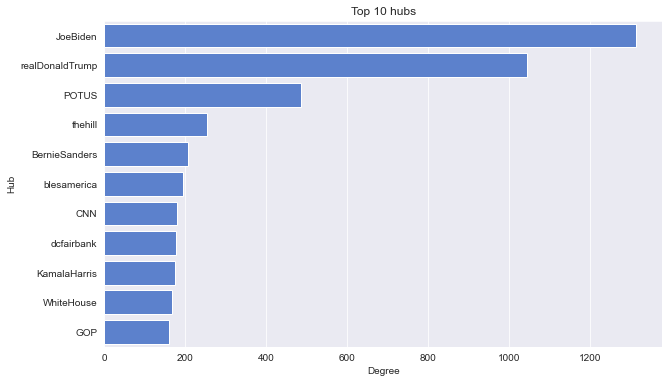

In [197]:
plt.rcParams["figure.figsize"]=[10,6]
sns.set_style("darkgrid")
sns.barplot(x= "Degree", y = "User", data= df_hubs_10, color = "#497bdf", )
plt.title("Top 10 hubs")
plt.xlabel("Degree")
plt.ylabel("Hub")
plt.show()

## Degree Distribution

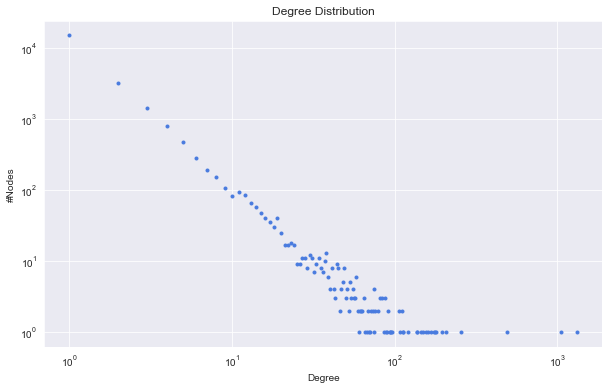

In [198]:
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".", color = '#497bdf')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [199]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """ 
    #cumulative density function
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    #complementary cumulative density function
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit


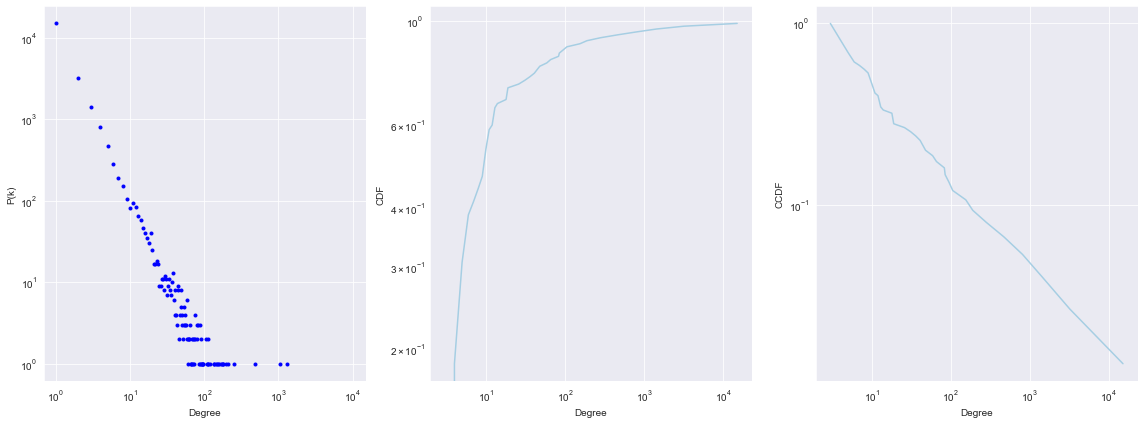

In [200]:
plot_dist(g)

## Components Analysis

In [232]:
comps = list(nx.connected_components(g))
print("Number of connected components: ", len(comps))


Number of connected components:  1182


In [202]:
comps_sorted = sorted(comps, key=len, reverse = True) 
#per capire qual è il giant component li ordino dal più grande al più piccolo


In [203]:
print("Number of nodes/users in the biggest connected component: ", len(max(comps_sorted)))

Number of nodes/users in the biggest connected component:  19675


In [204]:
print("Number of nodes/users in the second biggest connected component: ", len(comps_sorted[1]))

Number of nodes/users in the second biggest connected component:  24


In [205]:
biggest_comp = nx.Graph()
biggest_comp_cc = nx.subgraph(g, comps_sorted[0]) 

In [263]:
nx.write_gexf(biggest_comp_cc, "Biden_biggest_comp_cc.gexf")

## Diameter and Path

In [210]:
#diameter: the maximum distance between any pair of nodes in the graph
#maximal shortest path



diameter = nx.diameter(g.subgraph(comps[0]))
print ("The diameter of the graph is: ", diameter) 

The diameter of the graph is:  15


In [211]:
#average distance in the giant component
print("Average shortest path (g):", nx.average_shortest_path_length(g.subgraph(comps_sorted[0])))
print("Average shortest path weighted (g):", nx.average_shortest_path_length(g.subgraph(comps_sorted[0]), weight='weight'))

Average shortest path (g): 5.229745838101331
Average shortest path weighted (g): 5.229745838101331


In [212]:
#Average degree giant component
sum(dict(g.subgraph(comps_sorted[0]).degree()).values())/float(len(g.subgraph(comps_sorted[0])))

3.1060736975857686

## Triangles, density and clustering

In [213]:
#rete sparsa
nx.density(g)

0.00012549801098922763

In [225]:
nx.average_clustering(g_cc)

0.001601181565265985

In [233]:
nx.triangles(g_cc)['JoeBiden'] #count the triangles each node is involved in (and access the value of node JoeBiden)

33

# Centrality measures

### Degree Centrality
How many neighbors does a node have?

In [239]:
degrees = dict(g.degree())

In [240]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JoeBiden', 1314),
 ('realDonaldTrump', 1046),
 ('POTUS', 487),
 ('thehill', 254),
 ('BernieSanders', 207)]

In [244]:
df_degreeCentrality = pd.DataFrame(ranks, columns=['User', 'Degree'])

In [245]:
df_degreeCentrality

,User,Degree
0,JoeBiden,1314
1,realDonaldTrump,1046
2,POTUS,487
3,thehill,254
4,BernieSanders,207
...,...,...
22732,goldena33430596,1
22733,goldbergreaz,1
22734,1JohnEBravo,1
22735,carolstam7,1


In [246]:
df_dC_10 = df_degreeCentrality.iloc[:11]

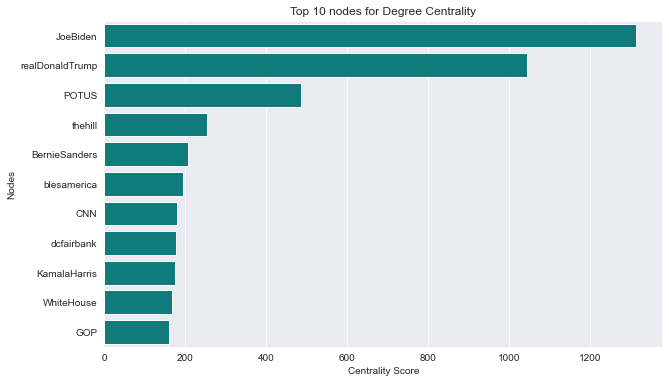

In [250]:
plt.rcParams["figure.figsize"]=[10,6]
sns.set_style("darkgrid")
sns.barplot(x= "Degree", y = "User", data= df_dC_10, color = "darkcyan", )
plt.title("Top 10 nodes for Degree Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Nodes")
plt.show()

## Geometric Centralities
l’idea per cui l’importanza di un nodo dipenda dalle distanze rispetto agli altri nodi

### Closeness Centrality
Farness: average of length of shortest paths to all other nodes
Closeness: inverse of the Farness (normalized by number of nodes)

Più la media degli shortest path è bassa più il nodo è centrale, più è alta più è periferico

In [251]:
closeness = nx.closeness_centrality(g) # compute the closeness centrality of all nodes 

In [252]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JoeBiden', 0.28153429440296845),
 ('realDonaldTrump', 0.2632703747397742),
 ('blesamerica', 0.26104604364799283),
 ('irvinepmaicon', 0.256553524556911),
 ('jphoganorg', 0.2503401041474524)]

In [253]:
df_ClosenessCentrality = pd.DataFrame(ranks, columns=['User', 'Degree'])

In [254]:
df_ClosenessCentrality

,User,Degree
0,JoeBiden,0.281534
1,realDonaldTrump,0.263270
2,blesamerica,0.261046
3,irvinepmaicon,0.256554
4,jphoganorg,0.250340
...,...,...
22732,pam44912308,0.000044
22733,glynndems,0.000044
22734,SarahRiggsAmico,0.000044
22735,gmouryas,0.000044


In [257]:
df_CC_10 = df_ClosenessCentrality.iloc[:11]

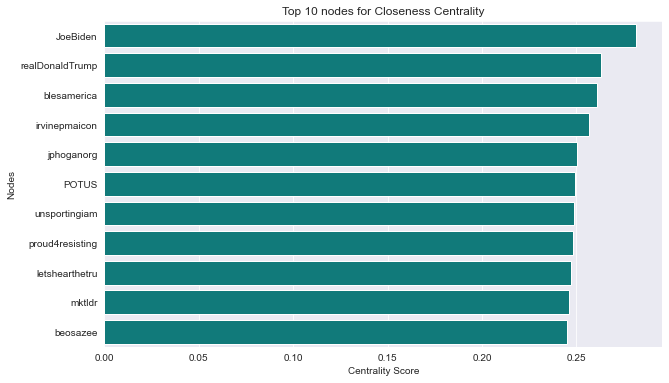

In [259]:
plt.rcParams["figure.figsize"]=[10,6]
sns.set_style("darkgrid")
sns.barplot(x= "Degree", y = "User", data= df_CC_10, color = "darkcyan", )
plt.title("Top 10 nodes for Closeness Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Nodes")
plt.show()

### Harmonic centrality
Harmonic mean of the geodesic (shorted paths) 
distances from a given node to all others. (come la closeness, solo che clacoli la media armonica)

In [266]:
harmonic = nx.harmonic_centrality(g)

In [267]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JoeBiden', 7632.944047617572),
 ('realDonaldTrump', 7033.257142857054),
 ('blesamerica', 6632.5551587294485),
 ('irvinepmaicon', 6484.415873015448),
 ('POTUS', 6408.030952381937)]

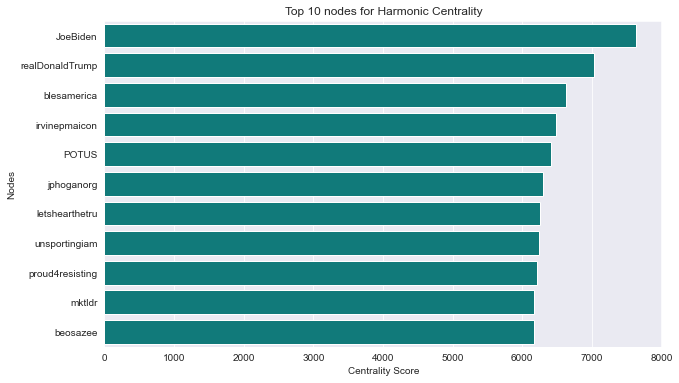

In [268]:
df_HCentrality = pd.DataFrame(ranks, columns=['User', 'Degree'])
df_HC_10 = df_HCentrality.iloc[:11]
plt.rcParams["figure.figsize"]=[10,6]
sns.set_style("darkgrid")
sns.barplot(x= "Degree", y = "User", data= df_HC_10, color = "darkcyan", )
plt.title("Top 10 nodes for Harmonic Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Nodes")
plt.show()

### Betweenness Centrality
Number of shortest paths that go through a node.

Assumption: important vertices are bridges over which information flows

Practically: if information spreads via shortest paths, important nodes are found on many shortest paths

In [261]:
betweenness = nx.betweenness_centrality(g_cc) # compute the betweenness centrality of all nodes 

In [264]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JoeBiden', 0.2638096311010423),
 ('realDonaldTrump', 0.1663914032893342),
 ('POTUS', 0.0838527309934754),
 ('blesamerica', 0.033280916725252116),
 ('thehill', 0.02666457059788305)]

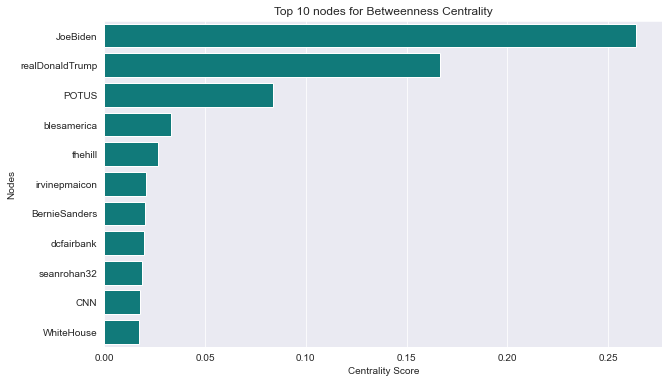

In [265]:
df_BetCentrality = pd.DataFrame(ranks, columns=['User', 'Degree'])
df_BC_10 = df_BetCentrality.iloc[:11]
plt.rcParams["figure.figsize"]=[10,6]
sns.set_style("darkgrid")
sns.barplot(x= "Degree", y = "User", data= df_BC_10, color = "darkcyan", )
plt.title("Top 10 nodes for Betweenness Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Nodes")
plt.show()

## Connectivity based centralities
la centralità di un nodo viene calcolata in base ai nodi a cui questo è connesso. È una definizione ricorsiva: i nodi importanti sono quelli collegati ad altri nodi importanti.

### PageRank

In [271]:
pagerank = nx.pagerank(g_cc)

In [283]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JoeBiden', 0.014892661333040803),
 ('realDonaldTrump', 0.012084398659346475),
 ('POTUS', 0.005720008869834269),
 ('thehill', 0.002918400595955434),
 ('mark3ds', 0.0022421339712293885)]

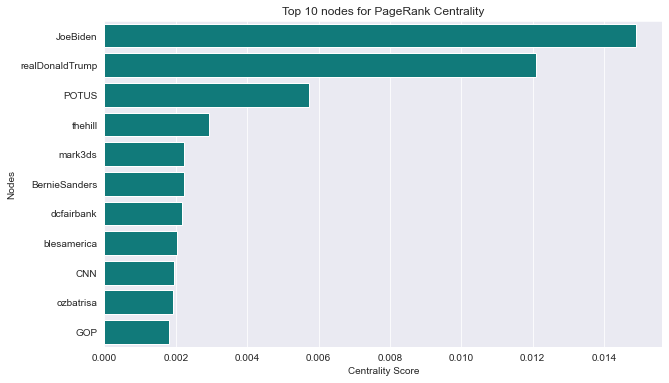

In [284]:
df_PRCentrality = pd.DataFrame(ranks, columns=['User', 'Degree'])
df_PRC_10 = df_PRCentrality.iloc[:11]
plt.rcParams["figure.figsize"]=[10,6]
sns.set_style("darkgrid")
sns.barplot(x= "Degree", y = "User", data= df_PRC_10, color = "darkcyan", )
plt.title("Top 10 nodes for PageRank Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Nodes")
plt.show()

### Eigenvector

In [280]:
eigen = nx.eigenvector_centrality(g_cc, max_iter = 200)

In [285]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('JoeBiden', 0.5707899681559704),
 ('realDonaldTrump', 0.330205078969052),
 ('POTUS', 0.09865521384243954),
 ('KamalaHarris', 0.06882416142249978),
 ('BernieSanders', 0.06574304485836048)]

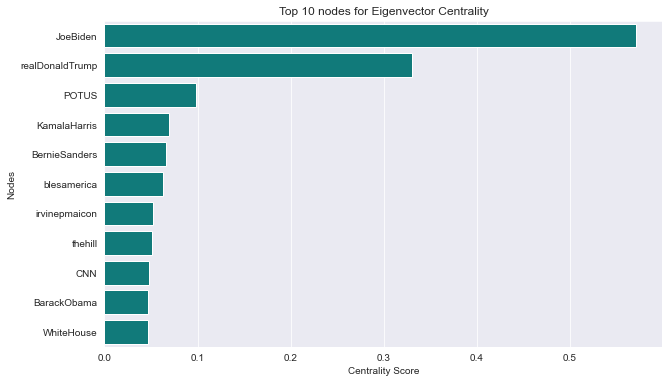

In [287]:
df_ECentrality = pd.DataFrame(ranks, columns=['User', 'Degree'])
df_EC_10 = df_ECentrality.iloc[:11]
plt.rcParams["figure.figsize"]=[10,6]
sns.set_style("darkgrid")
sns.barplot(x= "Degree", y = "User", data= df_EC_10, color = "darkcyan", )
plt.title("Top 10 nodes for Eigenvector Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Nodes")
plt.show()

## Assortative Mixing

### Newman's Assortativity
Quantify homophily while scalar node properties are involved (e.g., degree)

- Degree assortative:
Nodes tends to connect homogeneously w.r.t. their degree (e.g., hubs with hubs)

- Degree disassortative:
Nodes tends to connect in a star-like topology

Per valori compresi tra 0 e 1 si parla di assortative mixing, per valori tra 0 e -1 si parla di disassortative mixing. Se il valore è 0 non c’è correlazione, se è 1 o -1 si parla di assortative/disassortative mixing perfetto.

In [288]:
nx.degree_assortativity_coefficient(g) #dissortative (si connettono nodi diversi tra loro)

-0.06851335430205654

### KNNk


In [289]:
knn = nx.k_nearest_neighbors(g) #calculate the average nearest neighbor degree of nodes with degree k.
knn = dict(sorted(knn.items()))

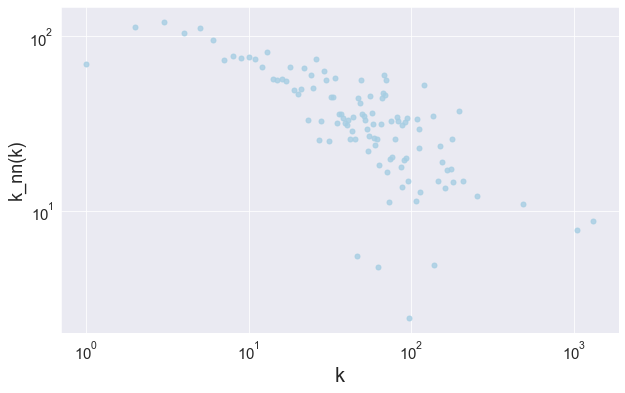

In [290]:
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
plt.loglog()
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

#disassortative